In [488]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os, glob

In [489]:
class CV:
    def __init__(self,adres):
        files=[]
        i=0
        for file in glob.glob(os.path.join(adres ,"*mvs.txt")):
            files.append(i)
            for j in list(range(100))[18:]:
                k=pd.read_csv(file, sep='\t', header=j, encoding='latin-1', engine='python')
                k=k[k.columns[0]].values.tolist()[0]
                if k=='Segment 1:':
                    header=j
                    break
            files[i]=pd.read_csv(file, sep=', ', header=header, encoding='latin-1', engine='python')
            files[i].dropna(inplace=True)
            i=i+1
        i=0
        self.files=files
        for file in self.files:
            V=file[file.columns[0]].values.tolist()
            I=file[file.columns[1]].values.tolist()
            C=file[file.columns[2]].values.tolist()
            for j in range(len(V)):
                V[j]=float(V[j])
            for j in range(len(I)):
                I[j]=float(I[j])
            for j in range(len(C)):
                C[j]=float(C[j])
            files[i]=[V,I,C]
            i=i+1
        self.files=files
    def wykres(self,label):
        for i in range(len(self.files)):
            plt.plot(self.files[i][0],np.array(self.files[i][1])*10**6,label=label[i])
        plt.ylabel('I [$\mu$A]')
        plt.xlabel('E [V]')
        plt.style.use('seaborn-whitegrid')
        plt.legend()
        plt.show()
class Chrono:
    def __init__(self,adres):
        files=[]
        i=0
        for file in glob.glob(os.path.join(adres ,"*.txt")):
            files.append(i)
            for j in range(100):
                k=pd.read_csv(file, sep='\t', header=j, encoding='latin-1', engine='python')
                k=k[k.columns[0]].values.tolist()[0]
                if k=='Step 1:':
                    header=j
                    break
            files[i]=pd.read_csv(file, sep=', ', header=header, encoding='latin-1', engine='python').drop([0])
            i=i+1
        i=0
        for file in files:
            t=file[file.columns[0]].values.tolist()
            I=file[file.columns[1]].values.tolist()
            for j in range(len(t)):
                t[j]=float(t[j])
            for j in range(len(I)):
                I[j]=float(I[j])
            files[i]=[np.array(t),np.array(I)]
            i=i+1
        self.files=files
    def wykres(self,label):
        for file in self.files:
            plt.plot(file[0],np.array(file[1])*10**6,label=label[self.files.index(file)])
        plt.ylabel('I [$\mu$A]')
        plt.xlabel('t [s]')
        plt.style.use('seaborn-whitegrid')
        plt.legend()
        plt.show()
    def D(self):
        A=0.0314
        c=[5,5,10,10]
        D=[]
        for i in range(len(self.files)):
            D.append(i)
            D[i]=(self.files[i][1]*self.files[i][0]**(1/2)*np.pi**(1/2))/(96485.3321*A*c[i])
            if D[i].mean() <0:
                D[i]=-D[i]
            D[i]=D[i].mean()
        D=[np.array(D).mean(),np.array(D).std()]
        return D

        

In [490]:
v20=CV('F:\Github Rep\Fizyczna\Fizyczna cwicz 26\cwicz 26\CV\CVDD')
v200=CV('F:\Github Rep\Fizyczna\Fizyczna cwicz 26\cwicz 26\CV\CVCC')

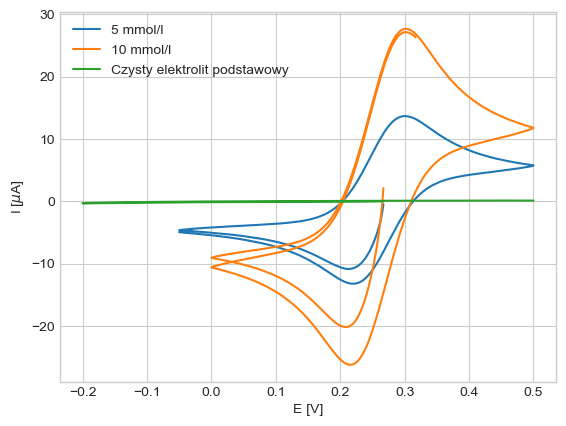

In [491]:
label=['5 mmol/l','10 mmol/l','Czysty elektrolit podstawowy']
v20.wykres(label)

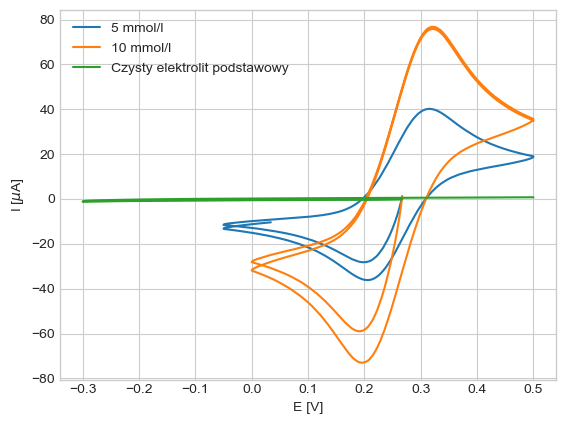

In [492]:
v200.wykres(label)

In [493]:
dane5=pd.read_excel('F:\Github Rep\Fizyczna\Fizyczna cwicz 26\cwicz 26\CV\D5mmol.xlsx')
dane10=pd.read_excel('F:\Github Rep\Fizyczna\Fizyczna cwicz 26\cwicz 26\CV\D10mmol.xlsx')
D=[dane5,dane10]
Dp=[]
i=0
for dana in D:
    Dp.append(i)
    chuj=[np.array(dana[dana.columns[i]].values.tolist()) for i in range(5)]
    Dp[i]=chuj
    i=i+1
D=Dp
dane5

,C [mM],V,Ipa,Ipc,Epa,Epc
0,5,2,-0.000005,0.000007,0.2223,0.304
1,5,20,-0.000015,0.000016,0.2190,0.301
2,5,40,-0.000021,0.000022,0.2170,0.304
3,5,80,-0.000028,0.000030,0.2130,0.308
4,5,120,-0.000033,0.000036,0.2100,0.310
5,5,160,-0.000037,0.000040,0.2060,0.313
6,5,200,-0.000040,0.000044,0.2060,0.316


In [494]:
def Reg(x,y):
        a=np.polyfit(x, y,1)[0]
        b=np.polyfit(x, y,1)[1]
        r=np.polyfit(x, y,1,full=True)[1]
        R2=1 - r / sum((y - y.mean())**2)
        return [a,b],R2

-2.766030067562691
2.9585156456029202
-5.276148134121091
5.559289867290529


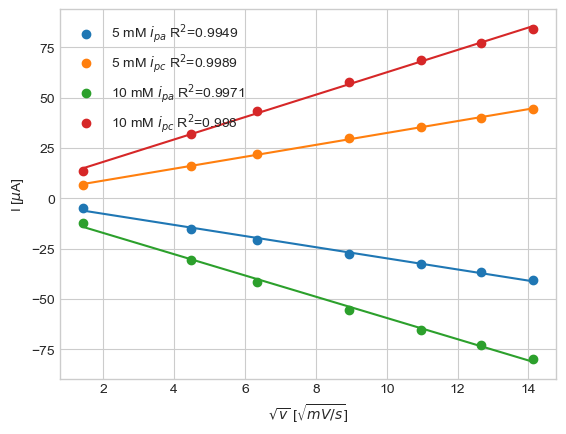

In [495]:
lab=['5 mM','10 mM']
a=[]
for i in range(len(D)):
    a.append(i)
    w=Reg(np.sqrt(D[i][1]),D[i][2]*10**6)[0]
    print(w[0])
    R2=Reg(np.sqrt(D[i][1]),D[i][2]*10**6)[1]
    zakres=np.array([np.sqrt(D[i][1][0]), np.sqrt(D[i][1][-1])])
    plt.scatter(np.sqrt(D[i][1]),D[i][2]*10**6,label=lab[i]+' $i_{pa} $' + f' R$^2$={round(float(R2),4)}')
    plt.plot(zakres,w[0]*zakres+w[1])
    w=Reg(np.sqrt(D[i][1]),D[i][3]*10**6)[0]
    print(w[0])
    R2=Reg(np.sqrt(D[i][1]),D[i][3]*10**6)[1]
    plt.scatter(np.sqrt(D[i][1]),D[i][3]*10**6,label=lab[i]+' $i_{pc} $' + f' R$^2$={round(float(R2),4)}')
    plt.plot(zakres,w[0]*zakres+w[1])
plt.ylabel('I [$\mu$A]')
plt.xlabel('$\sqrt{v}$ [$\sqrt{mV/s}$]')
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.show()

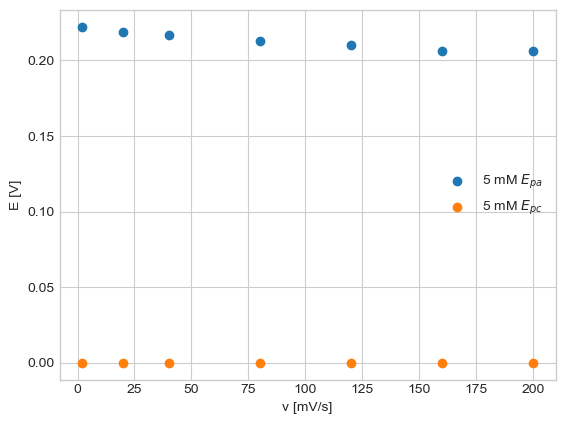

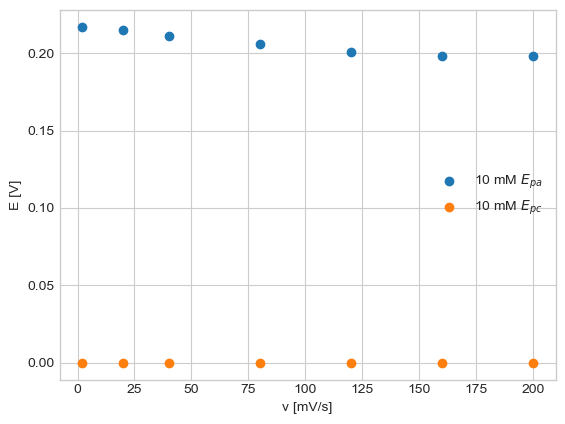

In [496]:
lab=['5 mM','10 mM']
for i in range(len(D)):
    plt.scatter(D[i][1],D[i][4],label=lab[i]+' $E_{pa} $')
    plt.scatter(D[i][1],D[i][3],label=lab[i]+' $E_{pc} $')
    plt.ylabel('E [V]')
    plt.xlabel('v [mV/s]')
    plt.style.use('seaborn-whitegrid')
    plt.legend()
    plt.show()

In [497]:
chrono=Chrono('F:\Github Rep\Fizyczna\Fizyczna cwicz 26\cwicz 26\chrono')


In [498]:
labels=['5 mmol/l anoda','5 mmol/l katoda',' 10 mmol/l anoda','10 mmol/l katoda']

In [499]:
chrono.D()

[1.6674592810316597e-09, 8.792906083596318e-11]

In [500]:
A=0.0314
a=np.array([-2.766030067562691,
2.9585156456029202,
-5.276148134121091,
5.559289867290529])
C=np.array([5,5,10,10])
D=(a/(A*C*2.69*10**5))**2
D.mean(), D.std()


(4.357638998162257e-09, 3.5888482968401904e-10)

In [501]:
len(chrono.files)

4